In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests
import plotly.express as px



import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv',encoding="latin-1")
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [3]:
df.shape
#9551 rows and 21 columns 

(9551, 21)

In [4]:
df.columns
#first 5 rows of the dataset, to get an idea of the data:

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
df.info()
#mix of data  like int , float , object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe().T
# Looking at just the numerical columns
#Looks like no restaurant has full 5 star rating

count          mean           std         min  \
Restaurant ID         9551.0  9.051128e+06  8.791521e+06   53.000000   
Country Code          9551.0  1.836562e+01  5.675055e+01    1.000000   
Longitude             9551.0  6.412657e+01  4.146706e+01 -157.948486   
Latitude              9551.0  2.585438e+01  1.100794e+01  -41.330428   
Average Cost for two  9551.0  1.199211e+03  1.612118e+04    0.000000   
Price range           9551.0  1.804837e+00  9.056088e-01    1.000000   
Aggregate rating      9551.0  2.666370e+00  1.516378e+00    0.000000   
Votes                 9551.0  1.569097e+02  4.301691e+02    0.000000   

                                25%           50%           75%           max  
Restaurant ID         301962.500000  6.004089e+06  1.835229e+07  1.850065e+07  
Country Code               1.000000  1.000000e+00  1.000000e+00  2.160000e+02  
Longitude                 77.081343  7.719196e+01  7.728201e+01  1.748321e+02  
Latitude                  28.478713  2.857047e+01  2.864276e+01  5.597698e+01  
Average Cost for two     250.000000  4.000000e+02  7.000000e+02  8.000000e+05  
Price range                1.000000  2.000000e+00  2.000000e+00  4.000000e+00  
Aggregate rating           2.500000  3.200000e+00  3.700000e+00  4.900000e+00  
Votes                      5.000000  3.100000e+01  1.310000e+02  1.093400e+04

In [7]:
df.isnull().sum()
#Since we can't determince what cuisines a restaurant has from the other features in the dataset
#we will just drop these null values.

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
df.dropna(inplace=True)
# drop null value 

In [9]:
df.isnull().sum()
#null value has been dropped 

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
df['Switch to order menu']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Switch to order menu, Length: 9542, dtype: object

In [11]:

df.value_counts('City')
# above values that India has the highest number of restaurants.

City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
             ... 
Randburg        1
Macedon         1
Lorn            1
Lincoln         1
Forrest         1
Length: 140, dtype: int64

In [12]:
df.City
#city names 

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546           ÛÁstanbul
9547           ÛÁstanbul
9548           ÛÁstanbul
9549           ÛÁstanbul
9550           ÛÁstanbul
Name: City, Length: 9542, dtype: object

In [13]:
df1=pd.read_excel('Country-Code.xlsx')
df1
#importing another file of country code that we will merge 

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [14]:
df2 = pd.merge(df,df1,on='Country Code',how='left')
df2.head()
#both the data set has been merged 

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [15]:
rating = df2.groupby(['Aggregate rating','Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating
#find how the ratings are ditributed
#Rating 0 - White - Not rated
#Rating 1.8 to 2.4 - Red - Poor
#Rating 2.5 to 3.4 - Orange - Average
#Rating 3.5 to 3.9 - Yellow - Good
#Rating 4.0 to 4.4 - Green - Very Good
#Rating 4.5 to 4.9 - Dark Green - Excellent

Aggregate rating Rating color Rating text  Rating Count
0                0.0        White   Not rated          2148
1                1.8          Red        Poor             1
2                1.9          Red        Poor             2
3                2.0          Red        Poor             7
4                2.1          Red        Poor            15
5                2.2          Red        Poor            27
6                2.3          Red        Poor            47
7                2.4          Red        Poor            87
8                2.5       Orange     Average           110
9                2.6       Orange     Average           191
10               2.7       Orange     Average           250
11               2.8       Orange     Average           315
12               2.9       Orange     Average           381
13               3.0       Orange     Average           468
14               3.1       Orange     Average           519
15               3.2       Orange     Average           522
16               3.3       Orange     Average           483
17               3.4       Orange     Average           495
18               3.5       Yellow        Good           480
19               3.6       Yellow        Good           458
20               3.7       Yellow        Good           427
21               3.8       Yellow        Good           399
22               3.9       Yellow        Good           332
23               4.0        Green   Very Good           266
24               4.1        Green   Very Good           274
25               4.2        Green   Very Good           221
26               4.3        Green   Very Good           174
27               4.4        Green   Very Good           143
28               4.5   Dark Green   Excellent            95
29               4.6   Dark Green   Excellent            78
30               4.7   Dark Green   Excellent            41
31               4.8   Dark Green   Excellent            25
32               4.9   Dark Green   Excellent            61

In [16]:
no_rating = df2[df2['Rating color']=='White'].groupby('Country').size().reset_index().rename(columns={0:'Rating Count'})
no_rating
#We see that India has come out on top.
#they are not ready to rate it seems 

Country  Rating Count
0          Brazil             5
1           India          2139
2  United Kingdom             1
3   United States             3

In [17]:
country_currency  = df2[['Country','Currency']].groupby(['Country','Currency']).size().reset_index(name='count').drop('count', axis=1 )
country_currency 
#Above table display country and the currency they accept

Country                Currency
0        Australia               Dollar($)
1           Brazil      Brazilian Real(R$)
2           Canada               Dollar($)
3            India      Indian Rupees(Rs.)
4        Indonesia  Indonesian Rupiah(IDR)
5      New Zealand           NewZealand($)
6      Phillipines        Botswana Pula(P)
7            Qatar         Qatari Rial(QR)
8        Singapore               Dollar($)
9     South Africa                 Rand(R)
10       Sri Lanka   Sri Lankan Rupee(LKR)
11          Turkey        Turkish Lira(TL)
12             UAE      Emirati Diram(AED)
13  United Kingdom              Pounds(£)
14   United States               Dollar($)

In [18]:
df2['Switch to order menu'].value_counts()
#Switch to order menu has no other value than 'No'.
#Since that is not much use for us, we are going to drop it

No    9542
Name: Switch to order menu, dtype: int64

In [19]:
df2.drop('Switch to order menu',axis=1,inplace=True)


In [20]:
#categorical columns turned out to be useless for us, it makes sense to also take a look at the rest of them

In [21]:
df2['Restaurant Name'].value_counts()

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

In [22]:
df2['Has Online delivery'].value_counts()

No     7091
Yes    2451
Name: Has Online delivery, dtype: int64

In [23]:
df2['Is delivering now'].value_counts()

No     9508
Yes      34
Name: Is delivering now, dtype: int64

In [24]:
df2['City'].value_counts()

New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lincoln              1
Lakeview             1
Lakes Entrance       1
Inverloch            1
Panchkula            1
Name: City, Length: 140, dtype: int64

In [25]:
df2['Locality'].value_counts()

Connaught Place                                122
Rajouri Garden                                  99
Shahdara                                        87
Defence Colony                                  86
Pitampura                                       85
                                              ... 
Omaxe Celebration Mall, Sohna Road, Gurgaon      1
Park Inn, Sector 15, Gurgaon                     1
Plaza Mall, MG Road                              1
Ramada Gurgaon Central, Sector 44                1
Moda                                             1
Name: Locality, Length: 1206, dtype: int64

In [26]:
#So, all of these columns do have more than one value. That means they could actually be useful.

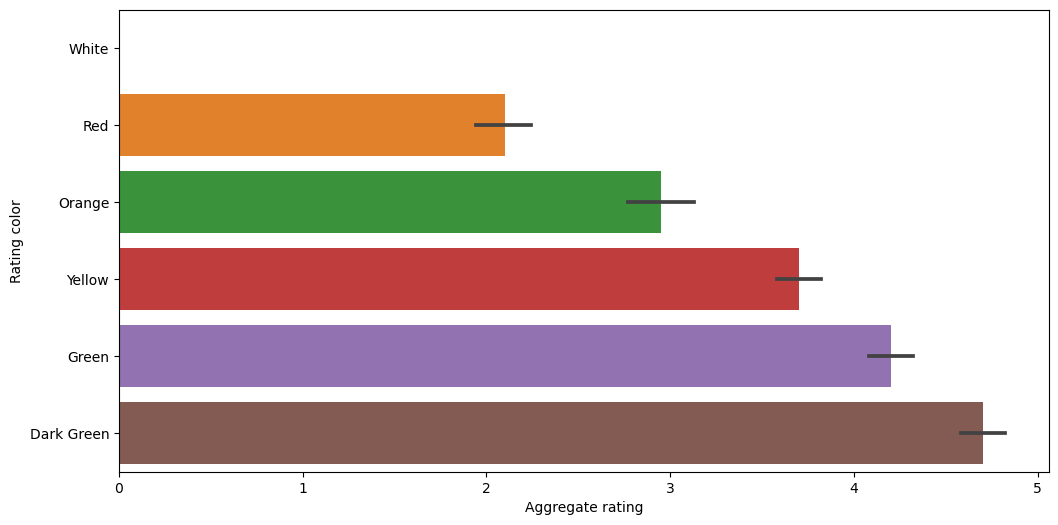

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating color',data=rating)
plt.show()
#barplot for Aggregate rating & Rating color


In [28]:
fix = px.pie(df2,names='Has Online delivery', title='Online Deliveries')
fix.show()
#We see that 74% of  total restaurants do not accept online orders.
#will check for country wise how many restaurant is there 

In [29]:
country_delivery  = df2[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index(name='count')
country_delivery 
#Only India and UAE have online delivery
#india having most number of restaurants having online deliveries

Has Online delivery         Country  count
0                   No       Australia     24
1                   No          Brazil     60
2                   No          Canada      4
3                   No           India   6229
4                   No       Indonesia     21
5                   No     New Zealand     40
6                   No     Phillipines     22
7                   No           Qatar     20
8                   No       Singapore     20
9                   No    South Africa     60
10                  No       Sri Lanka     20
11                  No          Turkey     34
12                  No             UAE     32
13                  No  United Kingdom     80
14                  No   United States    425
15                 Yes           India   2423
16                 Yes             UAE     28

In [30]:
#now will check about the cusine 
df2.loc[df2['Rating text'].isin(['Excellent'])].Cuisines.value_counts().sort_values(ascending=False).reset_index()
#Fetching the resturants having 'Excellent' and 'Very Good' rating

index  Cuisines
0                         Cafe         8
1                      Italian         7
2                 North Indian         7
3                       Indian         5
4                    Ice Cream         5
..                         ...       ...
209  Desserts, Bakery, Western         1
210       Continental, Mexican         1
211        North Indian, Asian         1
212         European, Desserts         1
213           Desserts, Bí_rek         1

[214 rows x 2 columns]

In [31]:
best_cuisine=df2.loc[df2['Rating text'].isin(['Excellent'])]

best_cuisine = best_cuisine.Cuisines.value_counts().reset_index().head(25)

cuisines= []
for cusine in best_cuisine['index']:
    cuisines.append(cusine)

cuisines
#extract best cusine 

['Cafe',
 'North Indian',
 'Italian',
 'Indian',
 'Ice Cream',
 'Seafood',
 'Desserts',
 'Asian',
 'North Indian, Mughlai',
 'Modern Indian',
 'Indian, North Indian',
 'Sunda, Indonesian',
 'Japanese',
 'Thai',
 'Desserts, Ice Cream',
 'European, Mediterranean, North Indian',
 'Fast Food',
 'North Indian, Chinese',
 'Mexican, American, Tex-Mex, Burger',
 'American',
 'Italian, Pizza',
 'Brazilian, Bar Food',
 'Japanese, Sushi',
 'Burger',
 'Bakery, Desserts']

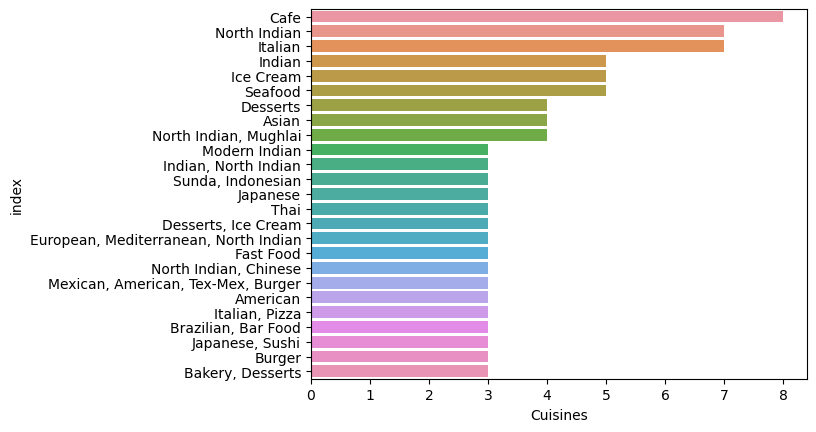

In [32]:
sns.barplot(y='index',x='Cuisines',data=best_cuisine)
plt.show()
#number of cuisines each type of restaurant has 

In [33]:
#will check average cost  

cost = df2.nlargest(30,'Average Cost for two')
cost

Restaurant ID                             Restaurant Name  Country Code  \
9274        7402935                                        Skye            94   
9275        7410290                    Satoo - Hotel Shangri-La            94   
9278        7420899                                  Sushi Masa            94   
9280        7421967                              3 Wise Monkeys            94   
9285        7422489                 Avec Moi Restaurant and Bar            94   
9279       18352452                  Lucky Cat Coffee & Kitchen            94   
9286       18386856                                     Onokabe            94   
9269        7423482                                  Lemongrass            94   
9276       18391256                                       MONKS            94   
9270        7422633                            Talaga Sampireun            94   
9272       18425821                                        OJJU            94   
9273        7422751                                  Union Deli            94   
9277        7400818                                       Zenbu            94   
9282        7417455                            Talaga Sampireun            94   
9287        7417450                            Talaga Sampireun            94   
9271        7405789                                 Toodz House            94   
9267       18400530                      Noah's Barn Coffeenery            94   
9281       18370659                                 Flip Burger            94   
9283       18409146                                 Fish Streat            94   
9284       18408381                                 Fish Streat            94   
9268        7423620                                   Momo Milk            94   
7534           2701           Orient Express - Taj Palace Hotel             1   
4079         309548    Tian - Asian Cuisine Studio - ITC Maurya             1   
4078           2742                        Bukhara - ITC Maurya             1   
8           6300010    Spiral - Sofitel Philippine Plaza Manila           162   
7483         301523  Nostalgia at 1911 Brasserie - The Imperial             1   
7485           2724                         1911 - The Imperial             1   
7490           2725              The Spice Route - The Imperial             1   
7529           2694    Wasabi by Morimoto - The Taj Mahal Hotel             1   
7513           6812                     MEGU - The Leela Palace             1   

            City                                            Address  \
9274     Jakarta  Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...   
9275     Jakarta               Hotel Shangri-La, Jl. Jend. Sudirman   
9278     Jakarta                   Jl. Tuna Raya No. 5, Penjaringan   
9280     Jakarta                Jl. Suryo No. 26, Senopati, Jakarta   
9285     Jakarta  Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta   
9279     Jakarta  Plaza Festival, South Parking, Jl. HR Rasuna S...   
9286   Tangerang  Alam Sutera Town Center, Jl. Alam Utama, Serpo...   
9269       Bogor      Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor   
9276     Jakarta  Komplek Graha Boulevard Timur, Summarecon Kela...   
9270     Jakarta                             Jl. Lingkar Luar Barat   
9272     Jakarta  Gandaria City, Lantai Upper Ground, Jl. Sultan...   
9273     Jakarta  Grand Indonesia Mall, Lantai Ground, East Mall...   
9277     Jakarta  Kota Kasablanka, Lantai Upper Ground, Food Soc...   
9282     Jakarta  Taman Impian Jaya Ancol, Jl. Lapangan Golf 7, ...   
9287   Tangerang  Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...   
9271     Jakarta         Jl. Cipete Raya No. 79, Fatmawati, Jakarta   
9267     Bandung              Jl. Dayang Sumbi No. 2, Dago, Bandung   
9281     Jakarta             Jl. Senopati No. 27, Senopati, Jakarta   
9283     Jakarta  Jl. Tanjung Duren Utara III, Blok M Kav. 32, T...   
9284     Jakarta     Jl. Tebet Timur Dalam Raya 44B, Tebet, Jakarta   
926

In [34]:
cost.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country'],
      dtype='object')

In [35]:
fix = px.pie(cost,names='Average Cost for two', title='cost for two')
fix.show()

In [36]:
#will check  barplot for averahe cost for two 

cost_fortwo=px.bar(cost,x='Restaurant Name',color='City',y='Average Cost for two',title = 'cost for two' )
cost_fortwo.show()
#City of Jakarta leads for costly 

Text(0.5, 1.0, 'Rating vs Cost of Two')

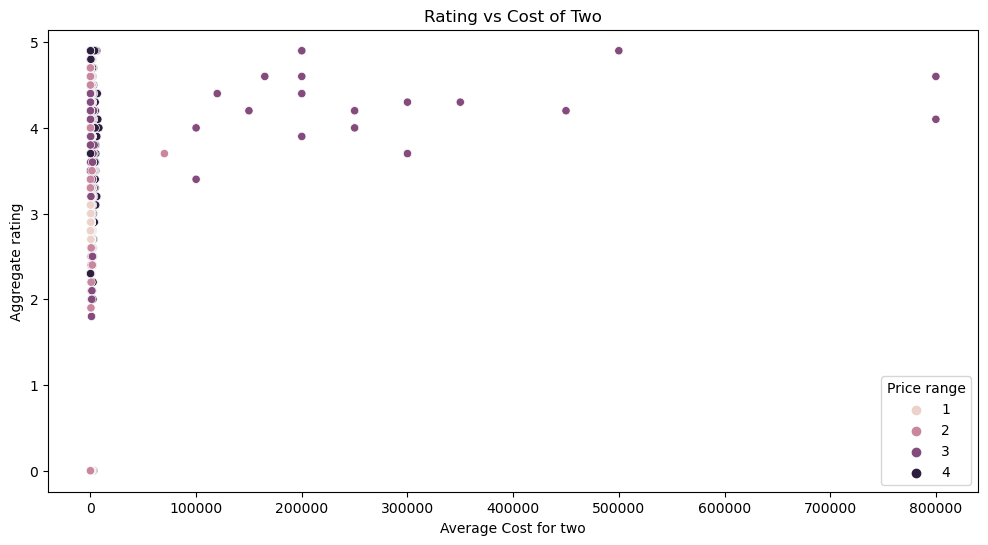

In [37]:
#rating VS Cost 
plt.figure(figsize=(12,6))
sns.scatterplot(x='Average Cost for two',y='Aggregate rating',hue='Price range',data=df2)

plt.xlabel("Average Cost for two")
plt.ylabel("Aggregate rating")
plt.title('Rating vs Cost of Two')

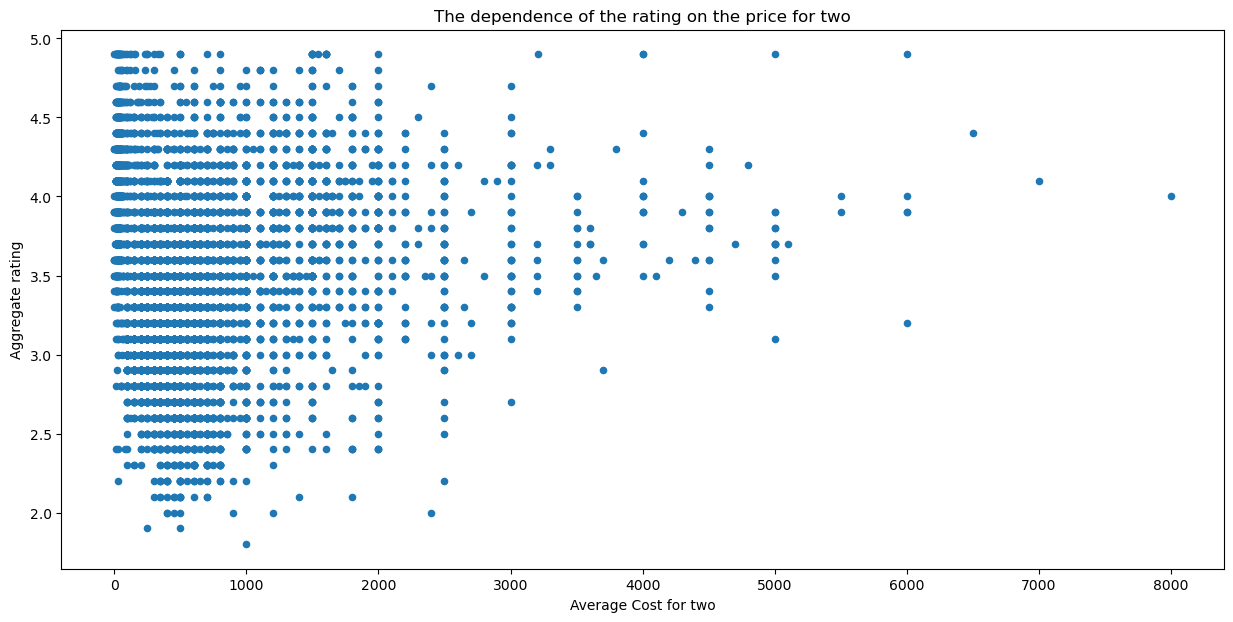

In [38]:
df2[(df2['Average Cost for two']<9000) & (df2['Aggregate rating']!=0)].plot.scatter(x = 'Average Cost for two', y = 'Aggregate rating', figsize=(15,7), title="The dependence of the rating on the price for two")
plt.show()
#Price range is distributed around the aggregrate rating
#maximum number of restaurants falls in the 0 - 1000 price range and 2.5 to 4.0 rating.

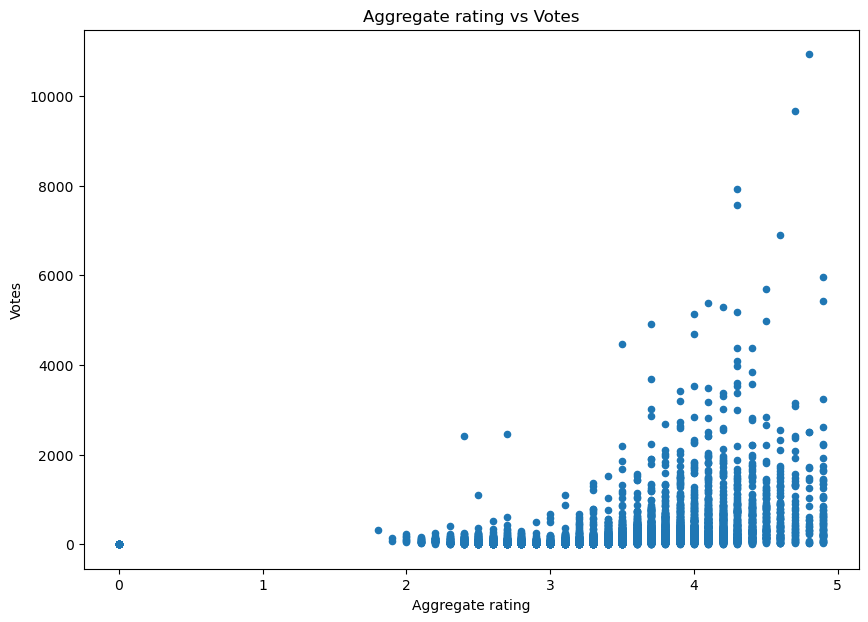

In [39]:
price_rating = df2.plot.scatter('Aggregate rating','Votes',figsize=(10,7))
plt.title('Aggregate rating vs Votes')
plt.show()
#Aggregate rating vs Votes
#maximum number of ratings lie between 3.5 to 4.8 whereas the frequency of votes which they have received are in the range 0-2000

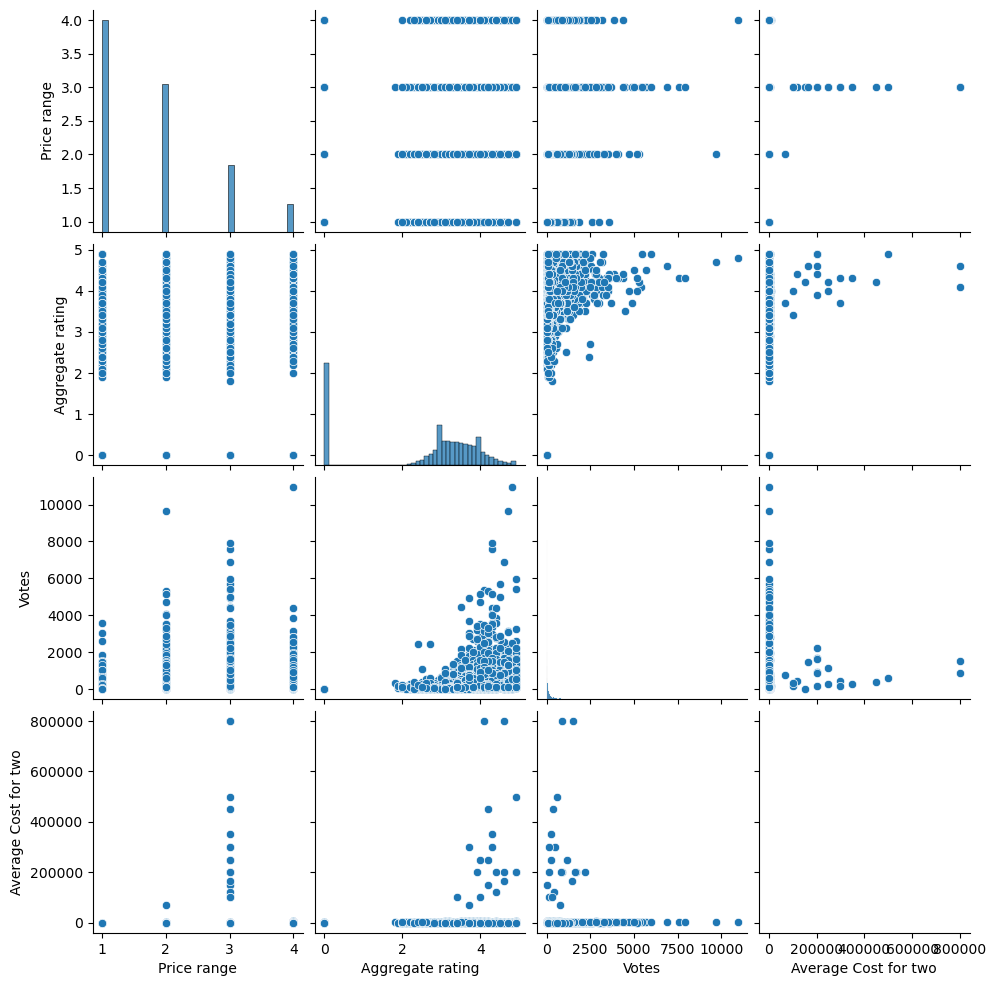

In [40]:
#will check with pair plot for range , rating , votes , average cost 

abc = ['Price range','Aggregate rating','Votes','Average Cost for two']
sns.pairplot(df2[abc])
plt.show()

In [41]:
df2['Restaurant Name'].value_counts()
#Restaurant Name are as follow 

Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: Restaurant Name, Length: 7437, dtype: int64

In [42]:
df2['Average Cost for two'].mean()
#mean of Average Price for two people

1200.3261370781806

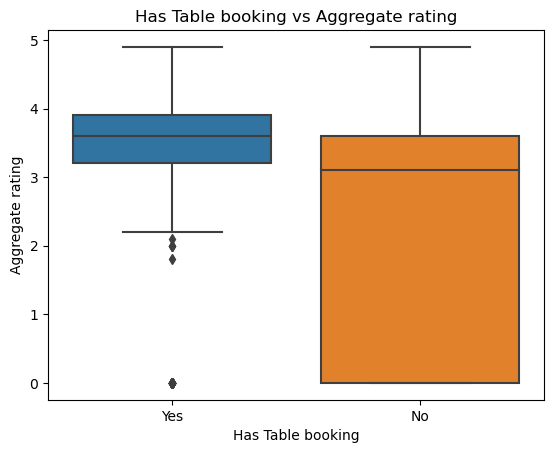

In [43]:
sns.boxplot(x='Has Table booking',y='Aggregate rating',data=df2)
plt.title('Has Table booking vs Aggregate rating')
plt.show()
#restaurants that have table reservations have a rating of around 3.8
#those which do not have table booking have aggregrate rating of around 3.1

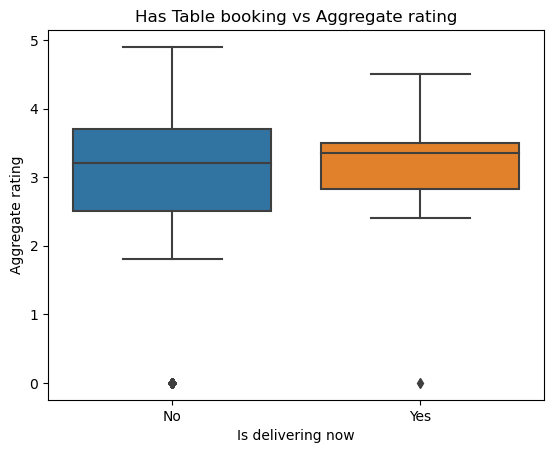

In [44]:
#will check Rating vs Availabilty of Delivery
sns.boxplot(x='Is delivering now',y='Aggregate rating',data=df2)
plt.title('Has Table booking vs Aggregate rating')
plt.show()
# no connection with the rating when we take into consideration

Text(0.5, 1.0, 'Resturants Listing on Zomato')

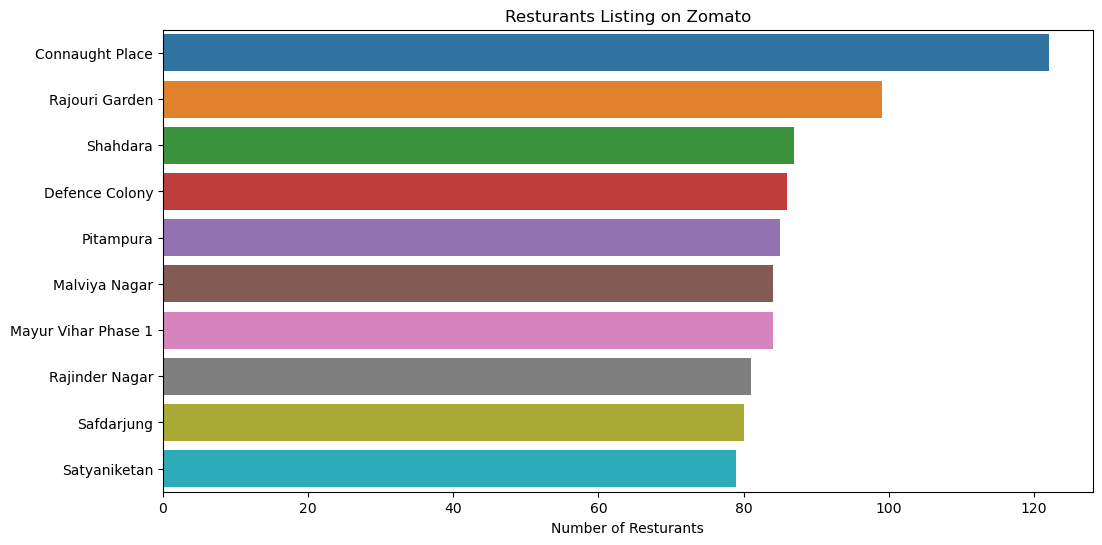

In [45]:
#5473 restaurant in delhi which is most let analyze delhi 
delhi = df2[df2.City=='New Delhi']
plt.figure(figsize=(12,6))
sns.barplot(x=delhi.Locality.value_counts().head(10),y=delhi.Locality.value_counts().head(10).index)

plt.xlabel('Number of Resturants')
plt.title('Resturants Listing on Zomato')

#Connaught place most restaurant 

In [46]:
import plotly.graph_objects as go

In [47]:
cuisine = delhi.Cuisines.value_counts()
label =  delhi.Cuisines.value_counts().index
fig = go.Figure(data=[go.Pie(labels=label[:10], values=cuisine[:10],title='Top 10 Cuisine'
                            )])
fig.show()
#Top 10 cuisines available

In [48]:
import plotly.express as px

ab = px.scatter(delhi, x="Average Cost for two", y="Aggregate rating", color='Price range',)
ab.show()
#Aggregate rating VS   "Average Cost for two
#Rating does not depend on the average cost for two.

In [49]:
delhi['Rating text'].value_counts()

Average      2495
Not rated    1425
Good         1128
Very Good     300
Poor           97
Excellent      28
Name: Rating text, dtype: int64

In [50]:
#The dataset is skewed towards India and doesn't represent the complete data of restaurants worldwide.
#Restaurants rating is categorized in categories
#Not Rated
#Average
#Good
#Very Good
#Excellent
#The top rated restaurants seems to be getting better rating 
# no relation between cost and rating

In [51]:
df2.isin(['','NA','-']).sum().any()
# no NA white space value 

False

In [52]:
features = ['Price range','Votes','Country Code','Restaurant ID','Longitude',
            'Has Table booking','Has Online delivery']
#This is going to be our final list of features for training and testing our model.
#We are not going to include the features Rating color and Rating text.
#will not result in an actually useful model.

In [53]:
x = pd.get_dummies(df2[features])
x


Price range  Votes  Country Code  Restaurant ID   Longitude  \
0               3    314           162        6317637  121.027535   
1               3    591           162        6304287  121.014101   
2               4    270           162        6300002  121.056831   
3               4    365           162        6318506  121.056475   
4               4    229           162        6314302  121.057508   
...           ...    ...           ...            ...         ...   
9537            3    788           208        5915730   28.977392   
9538            3   1034           208        5908749   29.041297   
9539            4    661           208        5915807   29.034640   
9540            4    901           208        5916112   29.036019   
9541            2    591           208        5927402   29.026016   

      Has Table booking_No  Has Table booking_Yes  Has Online delivery_No  \
0                        0                      1                       1   
1                        0                      1                       1   
2                        0                      1                       1   
3                        1                      0                       1   
4                        0                      1                       1   
...                    ...                    ...                     ...   
9537                     1                      0                       1   
9538                     1                      0                       1   
9539                     1                      0                       1   
9540                     1                      0                       1   
9541                     1                      0                       1   

      Has Online delivery_Yes  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  
...                       ...  
9537                        0  
9538                        0  
9539                        0  
9540                        0  
9541                        0  

[9542 rows x 9 columns]

In [54]:
y=df2['Aggregate rating']

In [55]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [57]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(x_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.37170086920394574
mean_squared_error: 1.413895361243676
Squareroot_mean_squared_error 1.1890733203817483
Root Mean Squared Log Error   0.17317428139339588


In [58]:
test_score =  LinearRegression.score(x_train,y_train)
test_score
#test score

0.38281316094115503

In [59]:
compare={"Actual": y_test, "Predict": y_pred}
pd.DataFrame(compare)
#copmring acutal  vs predcted 


Actual   Predict
7071     2.2  3.624464
5547     3.0  1.434772
7640     3.0  2.347244
302      3.8  3.548837
2962     3.5  3.382316
...      ...       ...
8681     0.0  1.856629
2548     3.5  2.791602
1962     3.1  2.657068
8675     0.0  1.912540
2071     3.6  1.946831

[1909 rows x 2 columns]

In [60]:
lin_reg=LinearRegression
maxR2_score=0
maxRS=0
for i in range(1,250):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.25)
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)
#R2 with 2 different tecniques also 

Best R2 Score is 0.4067194789752522 on Random_state 64


In [61]:
cv_score = (cross_val_score(lin_reg, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check       

Cross Validation Score: 28.799910307298106


In [62]:
# Ridge:
from sklearn.linear_model import RidgeCV
Ridge = RidgeCV()
Ridge = Ridge.fit(x_train, y_train)

# Prediction:
y_pred = Ridge.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: -148.29660841575222
mean_squared_error: 352.4086647441624
Squareroot_mean_squared_error 18.772550832110227
Root Mean Squared Log Error   2.932395740784759


In [63]:
cv_score = (cross_val_score(Ridge, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: -509143.1733334586


In [64]:
#RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(x_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(x_test)
# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))



r2_score: 0.9630242169496562
mean_squared_error: 0.08727985498742666
Squareroot_mean_squared_error 0.2954316418182498
Root Mean Squared Log Error   -1.2193177994613247


In [65]:
cv_score = (cross_val_score(RandomForestRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 95.30362603456777


In [66]:
#hyper parameter tunning  for RandomForestRegressor


#hyper parameter tunning 
grid_params = {
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=RandomForestRegressor,
                   param_grid = grid_params,
                   cv = 5)

In [68]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'max_depth': 13,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 4}

In [69]:
##hyper parameter tunning 
from sklearn.ensemble import RandomForestRegressor 
Final_mod =  RandomForestRegressor(n_estimators=60 , max_depth= 13, max_leaf_nodes = 9,
             min_samples_leaf = 4, min_samples_split =4)
Final_mod.fit(x_train,y_train)
y_pred=Final_mod.predict(x_test)
print('Mean absolute error :', mean_absolute_error(y_test,y_pred))
print('Mean squared error :', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model' )
print(r2_score(y_test,y_pred)) 
print('\n')

Mean absolute error : 0.21483792574389113
Mean squared error : 0.10564572122005973
Root Mean Squared Error: 0.32503187723677157


 R2 Score of Final Model
0.9552435866375721




In [70]:
#Decision_Tree
Decision_Tree = DecisionTreeRegressor()
Decision_Tree = Decision_Tree.fit(x_train, y_train)

# Prediction:
y_pred = Decision_Tree.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9367850907343109
mean_squared_error: 0.1492162615255658
Squareroot_mean_squared_error 0.38628520748996564
Root Mean Squared Log Error   -0.951179302846699


In [71]:
cv_score = (cross_val_score(Decision_Tree, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 91.70517608321249


In [72]:
#KNeighborsRegressor
KNeighborsRegressor = KNeighborsRegressor()
KNeighborsRegressor = KNeighborsRegressor.fit(x_train, y_train)

# Prediction:
y_pred = KNeighborsRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))


r2_score: 0.4869493375771312
mean_squared_error: 1.2110355406538138
Squareroot_mean_squared_error 1.1004705996317274
Root Mean Squared Log Error   0.09573790616338722


In [73]:
cv_score = (cross_val_score(KNeighborsRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 38.31492119848935


In [74]:
#GradientBoostingRegressor
GradientBoostingRegressor = GradientBoostingRegressor()
GradientBoostingRegressor = GradientBoostingRegressor.fit(x_train, y_train)

# Prediction:
y_pred = GradientBoostingRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9638734981789955
mean_squared_error: 0.08527516065980836
Squareroot_mean_squared_error 0.2920191100935149
Root Mean Squared Log Error   -1.2309360333295845


In [75]:
cv_score = (cross_val_score(GradientBoostingRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 95.60177862580016


In [76]:
#AdaBoostRegressor
AdaBoostRegressor = AdaBoostRegressor()
AdaBoostRegressor = AdaBoostRegressor.fit(x_train, y_train)

# Prediction:
y_pred = AdaBoostRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error  ',np.log(np.sqrt(mean_squared_error(y_test, y_pred))))

r2_score: 0.9445625519221038
mean_squared_error: 0.13085787588389666
Squareroot_mean_squared_error 0.36174283114375144
Root Mean Squared Log Error   -1.0168217308230876


In [77]:
cv_score = (cross_val_score(AdaBoostRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 94.2566109696478


In [78]:
#XGBRegressor
XGBRegressor = XGBRegressor()
XGBRegressor = XGBRegressor.fit(x_train, y_train)

# Prediction:
y_pred = XGBRegressor.predict(x_test)

# Scores:
print('r2_score:', r2_score(y_test, y_pred))
print('mean_squared_error:',mean_squared_error(y_test, y_pred))
print('Squareroot_mean_squared_error',np.sqrt(mean_squared_error(y_test, y_pred)))

r2_score: 0.9619233181847238
mean_squared_error: 0.08987848243037552
Squareroot_mean_squared_error 0.2997974023075842


In [79]:
cv_score = (cross_val_score(XGBRegressor, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check   

Cross Validation Score: 95.11412636482902


In [ ]:
#final algorith will be RFC 